In [1]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'train/'
TEST_DIR = 'test/'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                      image     label
0         train/angry\Training_10118481.jpg     angry
1         train/angry\Training_10120469.jpg     angry
2         train/angry\Training_10131352.jpg     angry
3         train/angry\Training_10161559.jpg     angry
4          train/angry\Training_1021836.jpg     angry
...                                     ...       ...
28704  train/surprise\Training_99916297.jpg  surprise
28705  train/surprise\Training_99924420.jpg  surprise
28706  train/surprise\Training_99937001.jpg  surprise
28707  train/surprise\Training_99951755.jpg  surprise
28708  train/surprise\Training_99984132.jpg  surprise

[28709 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                                      image     label
0       test/angry\PrivateTest_10131363.jpg     angry
1       test/angry\PrivateTest_10304478.jpg     angry
2        test/angry\PrivateTest_1054527.jpg     angry
3       test/angry\PrivateTest_10590091.jpg     angry
4        test/angry\PrivateTest_1109992.jpg     angry
...                                     ...       ...
7173  test/surprise\PublicTest_98089595.jpg  surprise
7174  test/surprise\PublicTest_98567249.jpg  surprise
7175  test/surprise\PublicTest_98972870.jpg  surprise
7176  test/surprise\PublicTest_99242645.jpg  surprise
7177  test/surprise\PublicTest_99446963.jpg  surprise

[7178 rows x 2 columns]
0         test/angry\PrivateTest_10131363.jpg
1         test/angry\PrivateTest_10304478.jpg
2          test/angry\PrivateTest_1054527.jpg
3         test/angry\PrivateTest_10590091.jpg
4          test/angry\PrivateTest_1109992.jpg
                        ...                  
7173    test/surprise\PublicTest_98089595.jpg
7174 

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [10]:
train_features = extract_features(train['image']) 

  0%|          | 0/28709 [00:00<?, ?it/s]

C:\Users\Hussnain Khalid\anaconda3\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [19]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 10, validation_data = (x_test,y_test)) 

Epoch 1/10


225/225 [==============================] - 131s 575ms/step - loss: 1.8224 - accuracy: 0.2477 - val_loss: 1.8187 - val_accuracy: 0.2471
Epoch 2/10
225/225 [==============================] - 132s 589ms/step - loss: 1.7875 - accuracy: 0.2541 - val_loss: 1.7035 - val_accuracy: 0.2885
Epoch 3/10
225/225 [==============================] - 131s 584ms/step - loss: 1.6936 - accuracy: 0.3138 - val_loss: 1.5651 - val_accuracy: 0.3780
Epoch 4/10
225/225 [==============================] - 121s 540ms/step - loss: 1.5549 - accuracy: 0.3860 - val_loss: 1.4168 - val_accuracy: 0.4505
Epoch 5/10
225/225 [==============================] - 121s 538ms/step - loss: 1.4721 - accuracy: 0.4243 - val_loss: 1.3776 - val_accuracy: 0.4592
Epoch 6/10
225/225 [==============================] - 121s 538ms/step - loss: 1.4140 - accuracy: 0.4533 - val_loss: 1.3053 - val_accuracy: 0.5013
Epoch 7/10
225/225 [==============================] - 121s 537ms/step - loss: 1.3719 - accuracy: 0.4747 - val_loss: 1.2842

In [20]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

C:\Users\Hussnain Khalid\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
from keras.models import model_from_json

In [22]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [23]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [24]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [25]:
image = 'train/sad/Training_1369050.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 119ms/step
model prediction is  angry


C:\Users\Hussnain Khalid\anaconda3\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 23ms/step
model prediction is  angry


C:\Users\Hussnain Khalid\anaconda3\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


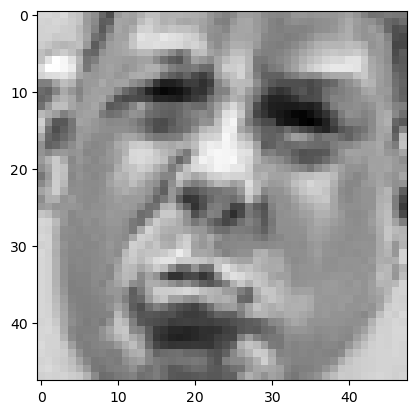

In [27]:
image = 'train/sad/Training_1369050.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 22ms/step
model prediction is  sad


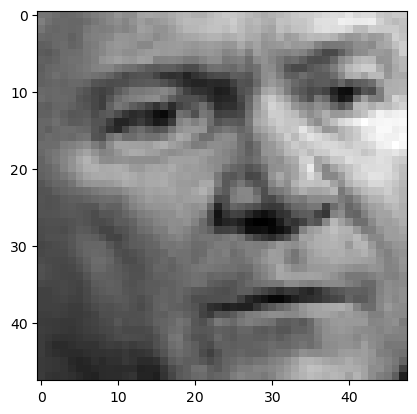

In [28]:
image = 'train/fear/Training_10133194.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [52]:
 # import the necessary packages
from os import path

# define the base path to the emotion dataset
BASE_PATH = "/raid/datasets/fer2013"
# use the base path to define the path to the input emotions file
INPUT_PATH = path.sep.join([BASE_PATH, "fer2013/fer2013.csv"])


In [53]:
# define the number of classes (set to 6 if you are ignoring the
# "disgust" class)
# NUM_CLASSES = 7
NUM_CLASSES = 6

In [54]:
# define the path to the output training, validation, and testing
# HDF5 files
TRAIN_HDF5 = path.sep.join([BASE_PATH, "hdf5/train.hdf5"])
VAL_HDF5 = path.sep.join([BASE_PATH, "hdf5/val.hdf5"])
TEST_HDF5 = path.sep.join([BASE_PATH, "hdf5/test.hdf5"])

In [55]:
# define the batch size
BATCH_SIZE = 128
# define the path to where output logs will be stored
OUTPUT_PATH = path.sep.join([BASE_PATH, "output"])
